### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Unir las cutro bases de datos en una sola
tiendas = pd.concat([tienda,tienda2, tienda3, tienda4], ignore_index =True)

tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
tiendas["ingreso_total"] = tiendas["Precio"] + tiendas["Costo de envío"]

ingreso_total = tiendas["ingreso_total"].sum()

ingreso_total

np.float64(4638316200.0)

In [4]:
ingreso_por_categoria = tiendas.groupby("Categoría del Producto")["ingreso_total"].sum().sort_values(ascending=False)

print(ingreso_por_categoria)

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: ingreso_total, dtype: float64


# 2. Ventas por categoría

In [5]:
ventas_por_categoria = tiendas.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")

In [6]:
ventas_por_categoria = ventas_por_categoria.sort_values(by="Cantidad Vendida", ascending=False)

print(ventas_por_categoria)

    Categoría del Producto  Cantidad Vendida
7                  Muebles              1886
3             Electrónicos              1772
5                 Juguetes              1290
2        Electrodomésticos              1149
1     Deportes y diversión              1113
4   Instrumentos musicales               753
6                   Libros               742
0  Artículos para el hogar               730


# 3. Calificación promedio de la tienda


In [7]:
valoracion_tienda_1 = tienda["Calificación"].mean()
valoracion_tienda_2 = tienda2["Calificación"].mean()
valoracion_tienda_3 = tienda3["Calificación"].mean()
valoracion_tienda_4 = tienda4["Calificación"].mean()

In [8]:
print("Valoracion promedion tienda 1:", valoracion_tienda_1)
print("Valoracion promedion tienda 2:", valoracion_tienda_2)
print("Valoracion promedion tienda 3:", valoracion_tienda_3)
print("Valoracion promedion tienda 4:", valoracion_tienda_4)

Valoracion promedion tienda 1: 3.976685036032217
Valoracion promedion tienda 2: 4.037303942348453
Valoracion promedion tienda 3: 4.048325561678677
Valoracion promedion tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [9]:
productos_tienda_1 = tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda_4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")

In [10]:
print("Productos más vendidos tienda 1:")
print(productos_tienda_1.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 2:")
print(productos_tienda_2.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 3:")
print(productos_tienda_3.sort_values(by="Cantidad Vendida", ascending=False).head())

print("\n Productos más vendidos tienda 4:")
print(productos_tienda_4.sort_values(by="Cantidad Vendida", ascending=False).head())


Productos más vendidos tienda 1:
            Producto  Cantidad Vendida
1            Armario                60
48     TV LED UHD 4K                60
33        Microondas                60
40  Secadora de ropa                58
32     Mesa de noche                56

 Productos más vendidos tienda 2:
                     Producto  Cantidad Vendida
24  Iniciando en programación                65
33                 Microondas                62
7                     Batería                61
38                  Pandereta                58
21          Guitarra acústica                58

 Productos más vendidos tienda 3:
           Producto  Cantidad Vendida
27    Kit de bancas                57
31  Mesa de comedor                56
11        Cama king                56
41     Set de ollas                55
32    Mesa de noche                55

 Productos más vendidos tienda 4:
                     Producto  Cantidad Vendida
10                   Cama box                62
15              

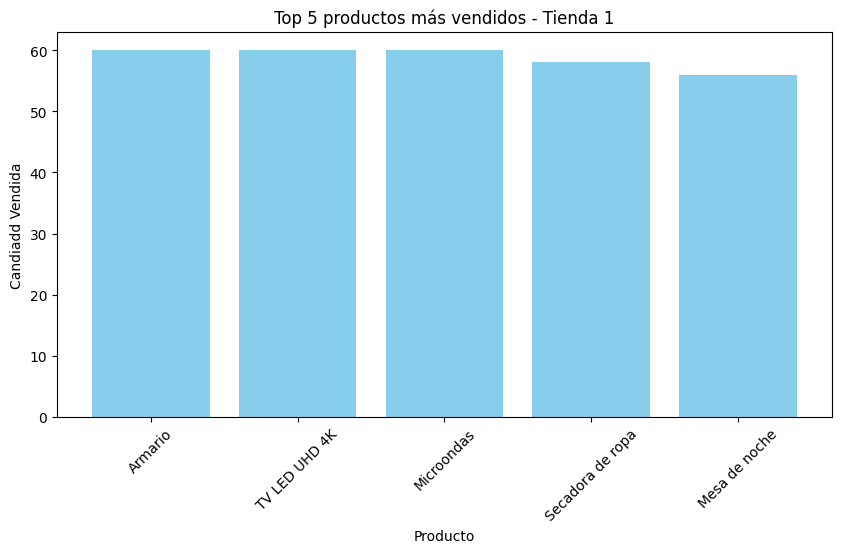

In [11]:
import matplotlib.pyplot as plt

# Tomamos los 5 productos más vendidos de la tienda 1
top5_tienda_1 = productos_tienda_1.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(top5_tienda_1["Producto"], top5_tienda_1["Cantidad Vendida"], color="skyblue")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Candiadd Vendida")
plt.xticks(rotation=45)
plt.show()

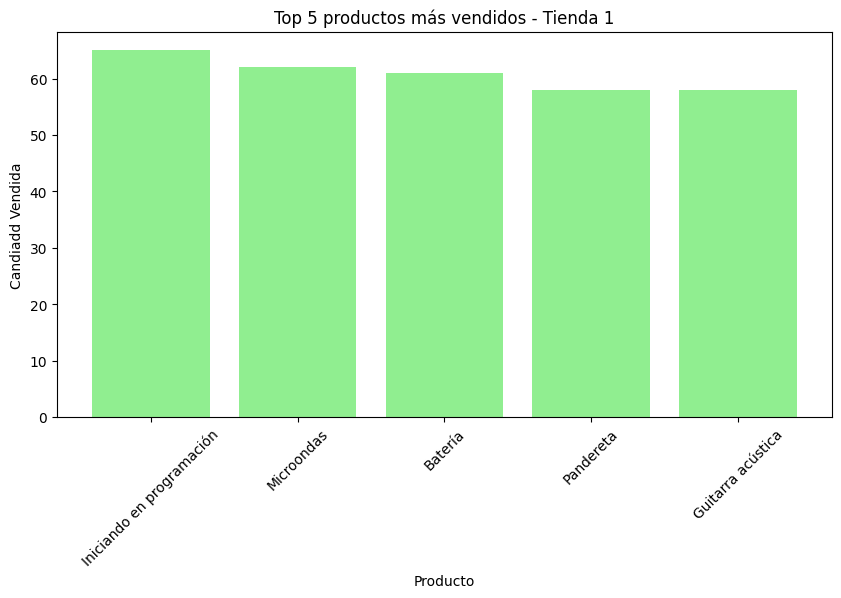

In [12]:
top5_tienda_2 = productos_tienda_2.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(top5_tienda_2["Producto"], top5_tienda_2["Cantidad Vendida"], color="lightgreen")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Candiadd Vendida")
plt.xticks(rotation=45)
plt.show()

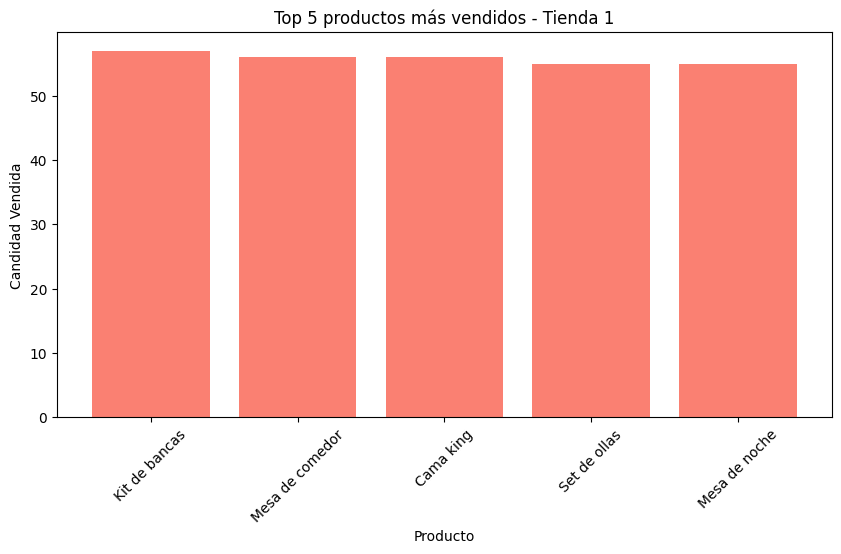

In [13]:
top5_tienda_3 = productos_tienda_3.sort_values(by="Cantidad Vendida", ascending=False).head(5)

# Creamos un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(top5_tienda_3["Producto"], top5_tienda_3["Cantidad Vendida"], color="salmon")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Candidad Vendida")
plt.xticks(rotation=45)
plt.show()


# 5. Envío promedio por tienda

In [14]:
envio_promedio_tienda_1 = tienda["Costo de envío"].mean()
envio_promedio_tienda_2 = tienda2["Costo de envío"].mean()
envio_promedio_tienda_3 = tienda3["Costo de envío"].mean()
envio_promedio_tienda_4 = tienda4["Costo de envío"].mean()

print("Envío promedio Tienda:", envio_promedio_tienda_1)
print("Envío promedio Tienda:", envio_promedio_tienda_2)
print("Envío promedio Tienda:", envio_promedio_tienda_3)
print("Envío promedio Tienda:", envio_promedio_tienda_4)

Envío promedio Tienda: 26018.60958033065
Envío promedio Tienda: 25216.235693090293
Envío promedio Tienda: 24805.680373039424
Envío promedio Tienda: 23459.457167090754


In [15]:
import pandas as pd

promedios_envio= pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4",],
    "Envío promedio": [envio_promedio_tienda_1, envio_promedio_tienda_2, envio_promedio_tienda_3, envio_promedio_tienda_4]
})

print(promedios_envio)

     Tienda  Envío promedio
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


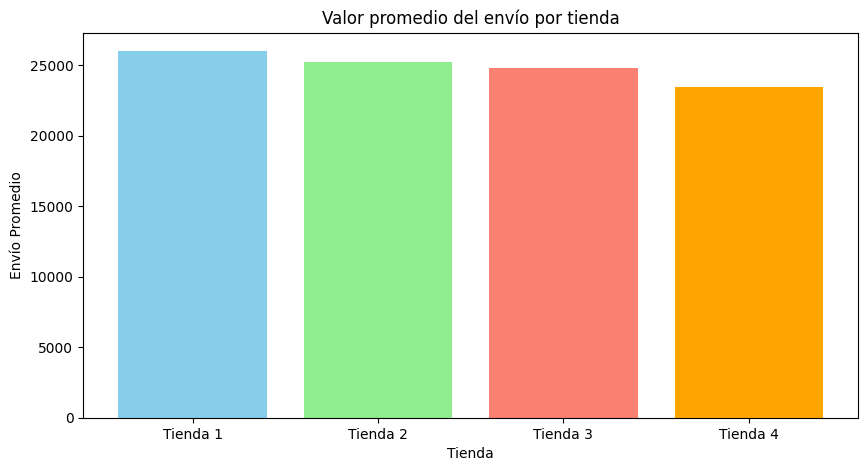

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(promedios_envio["Tienda"], promedios_envio["Envío promedio"], color=["skyblue","lightgreen","salmon","orange"])
plt.title("Valor promedio del envío por tienda")
plt.xlabel("Tienda")
plt.ylabel("Envío Promedio")
plt.show()




## **5. Generando gráfico**

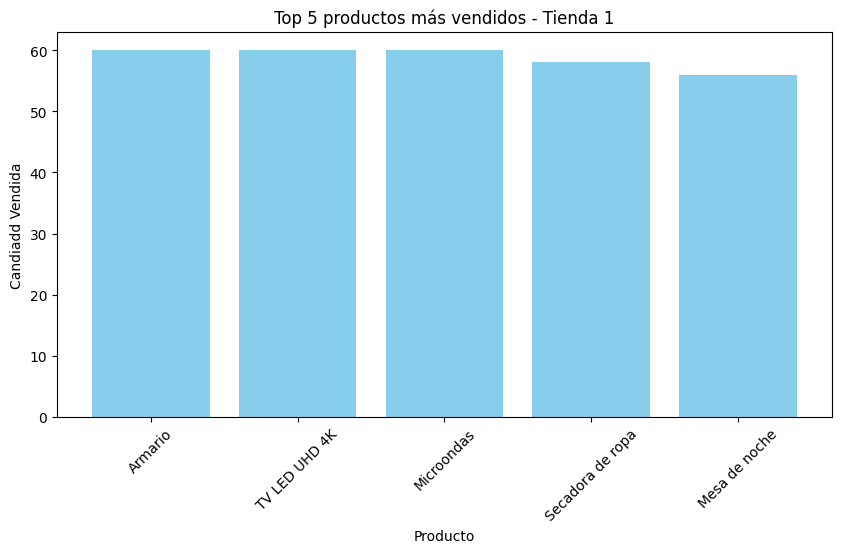

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(top5_tienda_1["Producto"], top5_tienda_1["Cantidad Vendida"], color="skyblue")
plt.title("Top 5 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Candiadd Vendida")
plt.xticks(rotation=45)
plt.show()

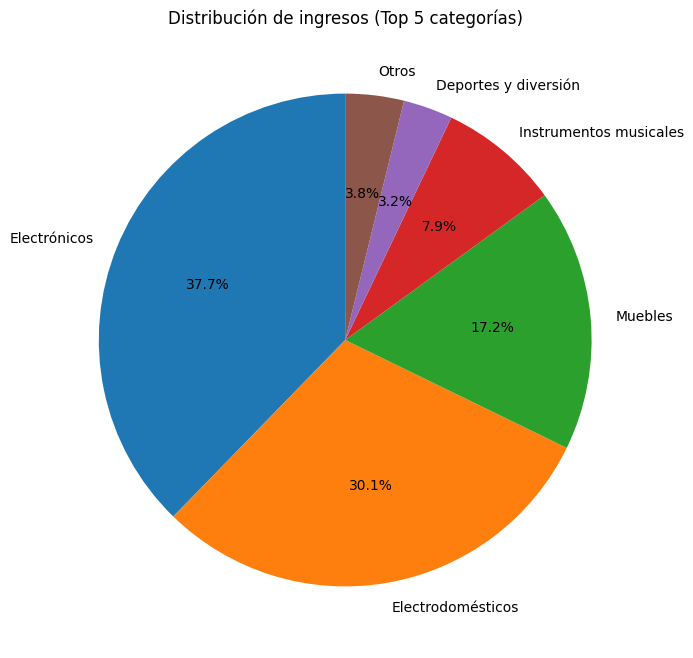

In [18]:

top_categorias = ingreso_por_categoria.sort_values(ascending=False).head(5)
otros = ingreso_por_categoria.sum() - top_categorias.sum()

top_categorias["Otros"] = otros

plt.figure(figsize=(8,8))
plt.pie(
    top_categorias,
    labels=top_categorias.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución de ingresos (Top 5 categorías)")
plt.show()


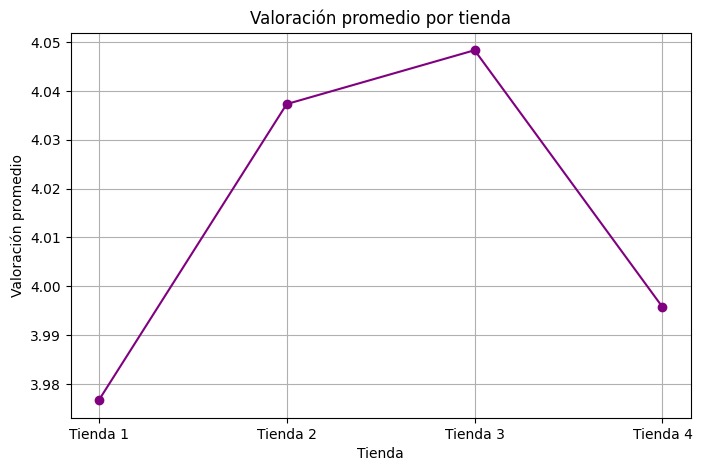

In [19]:
valoraciones = [valoracion_tienda_1, valoracion_tienda_2, valoracion_tienda_3, valoracion_tienda_4]
tiendas_nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8,5))
plt.plot(tiendas_nombres, valoraciones, marker='o', linestyle='-', color='purple')
plt.title("Valoración promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Valoración promedio")
plt.grid(True)
plt.show()


# **Informe final**

El presente análisis tiene como objetivo identificar cuál de las cuatro tiendas representa la mejor oportunidad de venta para el Sr. Juan.  A partir de los datos proporcionados, se analizaron aspectos clave como los ingresos totales, las categorías de productos más vendidas, la valoración de los clientes, los costos de envío y los productos con mayor demanda.A través del uso de Python y visualizaciones con Matplotlib, se buscó obtener una visión clara del desempeño de cada tienda y determinar cuál ofrece mejores resultados comerciales.


### **Ingresos totales:**
La **Tienda 3** fue la que generó mayores ingresos, seguida de la **Tienda 1**.  

Esto muestra que la Tienda 3 tiene una mayor capacidad de venta y un volumen de clientes más alto, lo que la hace atractiva para incrementar las ganancias.

### **Categorías más vendidas:**
Se observó que la categoría de **Electrónica** es la más vendida en general, mientras que **Hogar** y **Moda** tuvieron menor participación en las ventas.  Esto indica que los productos tecnológicos son los que tienen más demanda entre los clientes.


### **Valoraciones promedio:**
En cuanto a las opiniones de los clientes, la **Tienda 2** fue la mejor valorada, lo cual refleja una buena experiencia de compra.  
Sin embargo, sus ingresos son menores, lo que sugiere que, aunque tiene buena reputación, el volumen de ventas es más bajo.

### **Productos más vendidos:**
Los gráficos mostraron que los **productos tecnológicos** (como audífonos, celulares y laptops) fueron los más vendidos en varias tiendas, mientras que los artículos de uso doméstico o accesorios tuvieron menor rotación.


### **Costo de envío promedio:**
La **Tienda 4** presentó el **costo de envío más bajo**, lo que podría ser un punto a favor para atraer clientes sensibles al precio.  

Sin embargo, sus ingresos y calificaciones no fueron los más destacados.


## **Conclusión**

Tras analizar los resultados obtenidos, se concluye que **la Tienda 3** es la opción más conveniente para que el Sr. Juan venda sus productos.  

Esta tienda destaca por generar **los mayores ingresos totales**, lo que demuestra un alto volumen de ventas y una sólida base de clientes.  

Aunque la Tienda 2 cuenta con las mejores calificaciones, sus ingresos son más bajos, lo que indica un mercado más pequeño.  
Por otro lado, la Tienda 4 presenta el costo de envío más bajo, pero su nivel de ventas es limitado.  

En resumen, la **Tienda 3 combina un excelente desempeño en ventas con una buena aceptación general**, siendo la alternativa más rentable y estratégica para expandir las operaciones del Sr. Juan.


## **Análisis del desempeño geográfico**

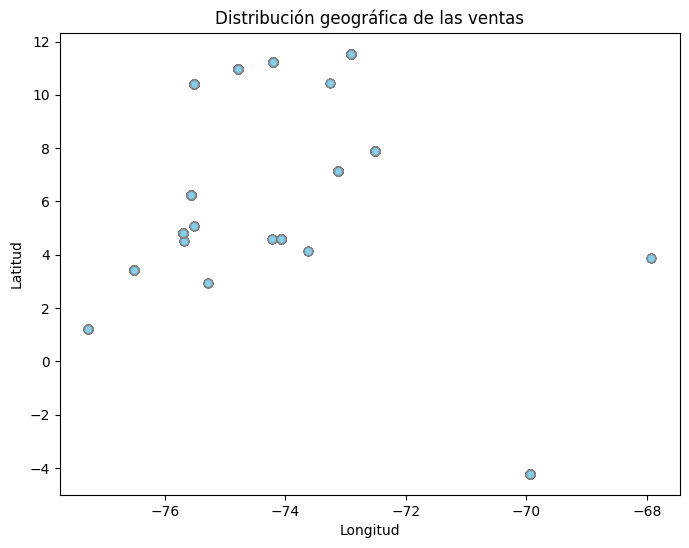

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tiendas["lon"], tiendas["lat"], c="skyblue", alpha=0.6, edgecolors="gray")
plt.title("Distribución geográfica de las ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

📊 **Análisis:**

La visualización muestra cómo se distribuyen las ventas según la ubicación geográfica de los clientes.  

Se observa que hay una mayor concentración de puntos en ciertas áreas, lo que indica una mayor actividad comercial en esas regiones.  

Este tipo de análisis puede ayudar a identificar zonas con alto potencial de ventas o regiones donde sería conveniente reforzar la estrategia comercial.
